Exploratory Data Analysis

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import parmap

In [2]:
df = pd.read_csv('/home/yjh/csv_data/0913_patent_All_코드 파악 ML 용역 송부용_Final_UTF8.csv', index_col = 0)
df.head()

/tmp/ipykernel_2638/101237122.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/yjh/csv_data/0913_patent_All_코드 파악 ML 용역 송부용_Final_UTF8.csv', index_col = 0)


,Application Number,DWPI Accession Number,Publication Year,Application Year,Publication Date,Application Date,Publication Country Code,Title,Title - DWPI,Abstract,...,Abstract - DWPI Tech Focus,Abstract - DWPI Drawing Description,Dead/Alive,IPC - Current,CPC - Current,DWPI Class,DWPI Manual Codes,Strategic Importance,Domain Influence,Combined Patent Impact
Publication Number,,,,,,,,,,,,,,,,,,,,,
KR2438562B1,KR20217005632A,NaN,2022.0,2012.0,2022-08-31,2012-01-12,KR,ENTROPY ENCODING AND DECODING SCHEME | 엔트로피 인코...,NaN,Decomposing the value range of each syntax ele...,...,NaN,NaN,Alive,H04N001913 | H04N001970,NaN,NaN,NaN,NaN,NaN,NaN
KR2431060B1,KR20207018858A,2012J26645,2022.0,2012.0,2022-08-09,2012-01-11,KR,5-SUBSTITUTED 2-PHENYLQUINOLINE COMPLEXES MATE...,New compound comprising 5-substituted quinolin...,The present invention relates to compounds com...,...,NaN,NaN,Alive,C07F001500 | C07C004992 | C07F001900 | C09K001...,H01L00510085 | C07C004992 | C07F001500 | C07F0...,E12 C | L03 C | T01 E | U11 E | U12 E | W...,E05-R | E24-A06A | L03-E05B | L03-G05F | L03-H...,1.0,1.0,1.0
KR2430870B1,KR20207018103A,2012Q17142,2022.0,2012.0,2022-08-09,2012-04-20,KR,ANTIBODIES FOR TREATMENT OF CANCER EXPRESSING ...,New claudin family of transmembrane protein an...,The present invention relates to tumors such a...,...,NaN,NaN,Indeterminate,C07K001628 | A61K003900 | A61K0039395 | C07K00...,C07K001630 | A61K0039395 | A61K003939591 | A61...,B04 C | D16 C,B04-C01G | B04-E99 | B04-G01 | B04-G0100E | B0...,1.0,1.0,1.0
KR2428875B1,KR20207027463A,2012P05544,2022.0,2012.0,2022-08-05,2012-04-27,KR,Therapeutic nuclease compositions and methods ...,New hybrid nuclease molecule comprising nuclea...,Hybrid nuclease molecules and methods for trea...,...,NaN,NaN,Alive,C12N000922 | A61K003800 | A61K004768 | A61P003...,C12N000922 | A61K003800 | A61K004768 | A61K004...,B04 C | D16 C,B04-C01G | B04-E02H | B04-E08 | B04-E99 | B04-...,1.0,1.0,1.0
KR2427003B1,KR20227010732A,2012L14270,2022.0,2012.0,2022-07-28,2012-01-20,KR,METHOD OF SIGNAL GENERATION AND SIGNAL GENERAT...,Signal generation method of multiple input and...,A transmission method for simultaneously trans...,...,NaN,NaN,Alive,H04L002726 | H04B00070413 | H04B000706 | H04L0...,H04B00070667 | H04B00070413 | H04B00070682 | H...,W01 E | W02 E,W01-A01A | W01-A09D | W02-C03A5 | W02-K07C,1.0,1.0,1.0


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1689891 entries, KR2438562B1 to KR2022122465A
Data columns (total 28 columns):
 #   Column                                Non-Null Count    Dtype  
---  ------                                --------------    -----  
 0   Application Number                    1689890 non-null  object 
 1   DWPI Accession Number                 1676649 non-null  object 
 2   Publication Year                      1688090 non-null  float64
 3   Application Year                      1689890 non-null  float64
 4   Publication Date                      1688090 non-null  object 
 5   Application Date                      1689890 non-null  object 
 6   Publication Country Code              1688090 non-null  object 
 7   Title                                 1689840 non-null  object 
 8   Title - DWPI                          1676650 non-null  object 
 9   Abstract                              1689849 non-null  object 
 10  Abstract (Original Language)          89437

In [4]:
print(df.columns)

Index(['Application Number', 'DWPI Accession Number', 'Publication Year',
       'Application Year', 'Publication Date', 'Application Date',
       'Publication Country Code', 'Title', 'Title - DWPI', 'Abstract',
       'Abstract (Original Language)', 'Abstract - DWPI',
       'Abstract - DWPI Novelty', 'Abstract - DWPI Detailed Description',
       'Abstract - DWPI Activity', 'Abstract - DWPI Mechanism',
       'Abstract - DWPI Use', 'Abstract - DWPI Advantage',
       'Abstract - DWPI Tech Focus', 'Abstract - DWPI Drawing Description',
       'Dead/Alive', 'IPC - Current', 'CPC - Current', 'DWPI Class',
       'DWPI Manual Codes', 'Strategic Importance', 'Domain Influence',
       'Combined Patent Impact'],
      dtype='object')


In [5]:
data_2col = df.loc[:, ['Abstract (Original Language)', 'IPC - Current']]
data_2col.head()
data_2col.to_csv("./data/data_2col.csv", mode='w')

In [6]:
df2 = pd.read_csv('./data/data_2col.csv', index_col = 0)
df2.head()

,Abstract (Original Language),IPC - Current
Publication Number,,
KR2438562B1,NaN,H04N001913 | H04N001970
KR2431060B1,NaN,C07F001500 | C07C004992 | C07F001900 | C09K001...
KR2430870B1,NaN,C07K001628 | A61K003900 | A61K0039395 | C07K00...
KR2428875B1,NaN,C12N000922 | A61K003800 | A61K004768 | A61P003...
KR2427003B1,NaN,H04L002726 | H04B00070413 | H04B000706 | H04L0...


In [7]:
print(df2.isnull().sum())

Abstract (Original Language)    795516
IPC - Current                       21
dtype: int64


In [8]:
df2 = df2.dropna()
df2 = df2.reset_index(drop=True)
df2.isnull().sum()

Abstract (Original Language)    0
IPC - Current                   0
dtype: int64

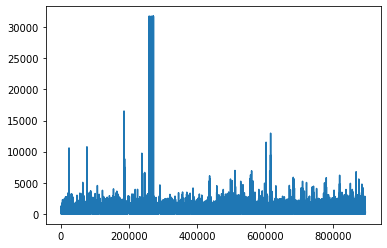

In [9]:
plt.plot(range(len(df2)), df2['Abstract (Original Language)'].map(len))

In [10]:
df3 = df2
df3['length'] = df3['Abstract (Original Language)'].map(len)
df3 = df3.sort_values(by= 'length', ascending=False)
df3.head(10000)

,Abstract (Original Language),IPC - Current,length
271614,회원정보에 포함된 멤버쉽정보 모바일단말기정보 구매한 물품정보 구매한 물품정보에 대한...,G06Q005030 | G06Q003002,31743
258720,회원정보에 포함된 멤버쉽정보 모바일단말기정보 구매한 물품정보 구매한 물품정보에 대한...,G06Q005030 | G06Q003002,31743
271630,회원정보에 포함된 멤버쉽정보 모바일단말기정보 구매한 물품정보 구매한 물품정보에 대한...,G06Q005030 | G06Q003002,31743
265475,회원정보에 포함된 멤버쉽정보 모바일단말기정보 구매한 물품정보 구매한 물품정보에 대한...,G06Q005030,31743
265474,회원정보에 포함된 멤버쉽정보 모바일단말기정보 구매한 물품정보 구매한 물품정보에 대한...,G06Q005030,31743
...,...,...,...
398999,"본 발명은 개선된 레이크가 구비된 제진기에 관한 것으로, 본 발명은 다수 개로 수평...",E02B000508 | E02B001510,1093
433598,본 발명은 자동차 분류별 맞춤형 예방정비 안내 시스템에 관한 것이다. 보다 상세하게...,G06Q005030,1093
328454,"본 발명은, 하기 화학식 I 또는 II의 화합물 또는 이의 약학적으로 허용가능한 산...",C07D047104 | A61K0031437 | A61K004900 | C07D04...,1093
575649,본 발명은 생체에 유익한 천연 광물질을 분말화 한 후 초음파 진동으로 천연 광물질에...,A61K000819 | A01N005900 | A61L000901,1093


In [11]:
df3.tail(10000)

,Abstract (Original Language),IPC - Current,length
339414,본 발명은 전지케이스의 내벽에 산소 스캐빈져(scavenger)를 포함하는 코팅층이...,H01M000202 | H01M0010052 | H01M001052,78
301106,"본 발명은 주쇄에 벤조디티오펜을 두 개이상 포함하는 공액계 고분자를 제공함으로써, ...",C08G006112 | H01L0031042,78
96701,\n\n본 발명은 에어백 체결플랜지에서 아마추어 체결공까지 높이를 점점 낮게 플랜지...,B60R0021203 | B62D000104 | B62D000110,78
566980,"투명전극용 보호층 조성물, 상기 투명전극용 보호층 조성물을 포함하는 투명전극용 보호...",C09D000712 | C09D000524 | C09D020100,78
375078,"본 고안은 자외선 살균램프를 이용하여 마우스를 살균하는데 있어서, 컴퓨터 USB전...",A61L000210,78
...,...,...,...
35616,-,G02C000500 | G02C001100,1
395342,.,G06F000301,1
179176,.,A47K001110 | B08B0009027,1
395763,.,A63C000300 | A45B000100,1


In [12]:
preprocessed_df = df3[df3['length']< 1000]
preprocessed_df = preprocessed_df[preprocessed_df['length']> 50]
preprocessed_df = preprocessed_df.reset_index(drop=True)
preprocessed_df.head()

,Abstract (Original Language),IPC - Current,length
0,"본 발명은 ＩＯＴ스마트 플랫폼을 이용한 버스 냉난방 제어방법에 관한 것으로서, 본 ...",F25B001300 | B60H000100 | B60N000500 | F25B004900,999
1,본 발명은 PVC 등과 같은 필름을 열융착함에 따른 유해가스가 전혀 발생하지 않고 ...,B32B003806 | B32B002708 | B32B002740 | B32B003...,999
2,본 발명은 헤드셋중에서 블루투스용 헤드셋에 관한 것으로서 기존 일반 이어폰이나 헤드...,H04R000110,999
3,"본 발명은 설치 지점이 높은 공장용 LED 램프, 옥외용 LED 보안등, 옥외용 L...",F21V002970 | F21K000920 | F21V001712,999
4,본 발명은 인쇄하고자 하는 망사직물원단이 무한궤도의 컨베이어벨트에 다수의 열로 정렬...,B41M000306 | B41F001900 | D06C002304,999


In [13]:
len(preprocessed_df)

876495

In [18]:
import tqdm

preprocessed_df['IPC - Nchar'] = 0
num_char = 4

print("Strart")
for i in tqdm.tqdm(range(len(preprocessed_df))):
    cur_str = ''
    try:
        cur_data = preprocessed_df['IPC - Current'][i].split('|')
    except:
        preprocessed_df['IPC - Nchar'][i] = cur_data[:num_char]
    for d in cur_data:
        d = d.strip()
        cur_str += d[:num_char] + '|'
    cur_str = cur_str[:-1]
    preprocessed_df['IPC - Nchar'][i] = cur_str

Strart


  0%|          | 0/876495 [00:00<?, ?it/s]/tmp/ipykernel_2638/344424770.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_df['IPC - Nchar'][i] = cur_str
100%|██████████| 876495/876495 [00:16<00:00, 53575.29it/s]


In [19]:
preprocessed_df.head()

,Abstract (Original Language),IPC - Current,length,IPC - Nchar
0,"본 발명은 ＩＯＴ스마트 플랫폼을 이용한 버스 냉난방 제어방법에 관한 것으로서, 본 ...",F25B001300 | B60H000100 | B60N000500 | F25B004900,999,F25B|B60H|B60N|F25B
1,본 발명은 PVC 등과 같은 필름을 열융착함에 따른 유해가스가 전혀 발생하지 않고 ...,B32B003806 | B32B002708 | B32B002740 | B32B003...,999,B32B|B32B|B32B|B32B|B32B|B60N
2,본 발명은 헤드셋중에서 블루투스용 헤드셋에 관한 것으로서 기존 일반 이어폰이나 헤드...,H04R000110,999,H04R
3,"본 발명은 설치 지점이 높은 공장용 LED 램프, 옥외용 LED 보안등, 옥외용 L...",F21V002970 | F21K000920 | F21V001712,999,F21V|F21K|F21V
4,본 발명은 인쇄하고자 하는 망사직물원단이 무한궤도의 컨베이어벨트에 다수의 열로 정렬...,B41M000306 | B41F001900 | D06C002304,999,B41M|B41F|D06C


In [20]:
preprocessed_df = preprocessed_df.loc[:, ['Abstract (Original Language)', 'IPC - Current', 'IPC - Nchar']]
preprocessed_df.to_csv("./data/preprocessed_data.csv", mode='w')

In [21]:
preprocessed_df.head()

,Abstract (Original Language),IPC - Current,IPC - Nchar
0,"본 발명은 ＩＯＴ스마트 플랫폼을 이용한 버스 냉난방 제어방법에 관한 것으로서, 본 ...",F25B001300 | B60H000100 | B60N000500 | F25B004900,F25B|B60H|B60N|F25B
1,본 발명은 PVC 등과 같은 필름을 열융착함에 따른 유해가스가 전혀 발생하지 않고 ...,B32B003806 | B32B002708 | B32B002740 | B32B003...,B32B|B32B|B32B|B32B|B32B|B60N
2,본 발명은 헤드셋중에서 블루투스용 헤드셋에 관한 것으로서 기존 일반 이어폰이나 헤드...,H04R000110,H04R
3,"본 발명은 설치 지점이 높은 공장용 LED 램프, 옥외용 LED 보안등, 옥외용 L...",F21V002970 | F21K000920 | F21V001712,F21V|F21K|F21V
4,본 발명은 인쇄하고자 하는 망사직물원단이 무한궤도의 컨베이어벨트에 다수의 열로 정렬...,B41M000306 | B41F001900 | D06C002304,B41M|B41F|D06C


In [22]:
data_light = preprocessed_df.iloc[range(10000), :]

In [23]:
data_light.head()

,Abstract (Original Language),IPC - Current,IPC - Nchar
0,"본 발명은 ＩＯＴ스마트 플랫폼을 이용한 버스 냉난방 제어방법에 관한 것으로서, 본 ...",F25B001300 | B60H000100 | B60N000500 | F25B004900,F25B|B60H|B60N|F25B
1,본 발명은 PVC 등과 같은 필름을 열융착함에 따른 유해가스가 전혀 발생하지 않고 ...,B32B003806 | B32B002708 | B32B002740 | B32B003...,B32B|B32B|B32B|B32B|B32B|B60N
2,본 발명은 헤드셋중에서 블루투스용 헤드셋에 관한 것으로서 기존 일반 이어폰이나 헤드...,H04R000110,H04R
3,"본 발명은 설치 지점이 높은 공장용 LED 램프, 옥외용 LED 보안등, 옥외용 L...",F21V002970 | F21K000920 | F21V001712,F21V|F21K|F21V
4,본 발명은 인쇄하고자 하는 망사직물원단이 무한궤도의 컨베이어벨트에 다수의 열로 정렬...,B41M000306 | B41F001900 | D06C002304,B41M|B41F|D06C


In [24]:
len(data_light)

10000

In [25]:
data_light.to_csv("./data/preprocessed_data_light.csv", mode='w')

In [2]:
preprocessed_df = pd.read_csv('./data/preprocessed_data.csv', index_col = 0)

  0%|          | 0/876495 [00:00<?, ?it/s]

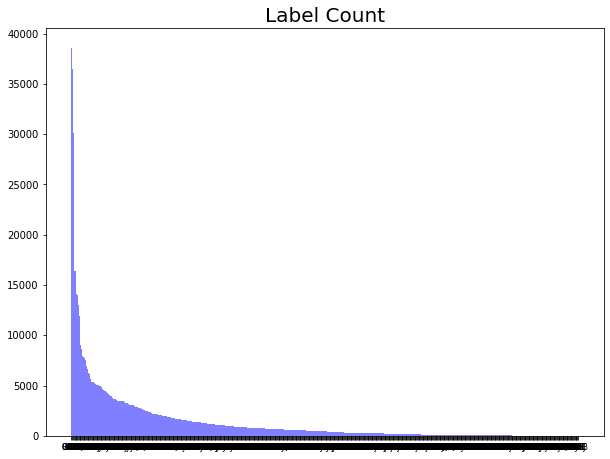

In [23]:
feature = preprocessed_df['IPC - Nchar']
def func1(input):
    return input[:4]
result = parmap.map(func1, feature, pm_pbar=True, pm_processes=16)
mySeries = pd.Series(result) 

plt.figure(figsize=(10,7.5))
plt.title('Label Count', fontsize=20)

temp = mySeries.value_counts()
plt.bar(temp.keys(), temp.values, width=1.0, color='b', alpha=0.5)

plt.xticks(temp.keys(), fontsize=8) # x축 값, 폰트 크기 설정
# plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

In [25]:
temp.sort_values()

<bound method Series.sort_values of H01L    38616
G06F    36524
G06Q    35703
A61K    30127
H04N    16376
        ...  
C06F        1
B62C        1
G06E        1
G06J        1
B41B        1
Length: 627, dtype: int64>